In [1]:
import numpy as np
import pylab as plt
from scipy.signal import firwin
from utils import *
%matplotlib inline
np.set_printoptions(precision=4)

In [2]:
PHASE = 6
TAPS = 6

In [3]:
taps = firwin(TAPS*PHASE, 1/(PHASE), window="blackman")
# scaling
taps = taps * PHASE

In [4]:
# test signal
FREQ = 5
N1 = 32
x = np.arange(0, 1, 1/N1)
y = np.sin(x*2*np.pi*FREQ)

In [5]:
# bank selection
def c(p):
    i = [x*PHASE+p for x in range(TAPS)]
    return taps[i]

In [6]:
OFFSET = 0
N2 = N1
y_interpolated = np.zeros(N2)
for i in range(TAPS, N1):
    d = y[i-TAPS:i]
    y_interpolated[i] = np.sum(d*c(OFFSET))
# delay compensation
fir_delay = TAPS//2
phase_offset = (OFFSET)/PHASE
x_interpolated = x + 1/N2*phase_offset - 1/N2*fir_delay

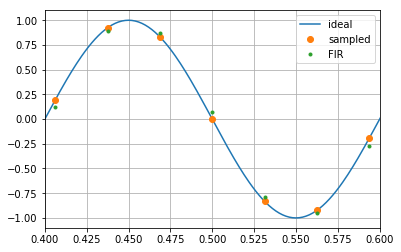

In [7]:
x_ideal = np.arange(0, 1, 1/1000)
y_ideal = np.sin(x_ideal*2*np.pi*FREQ)
plt.plot(x_ideal, y_ideal, label="ideal")
plt.plot(x, y, 'o', label="sampled")
plt.plot(x_interpolated, y_interpolated, '.', label="FIR")
plt.xlim(0.4, 0.6)
plt.grid()
plt.legend()
plt.show()